# **ResNet modelo creado**

# **Adrian Pineda Sanchez A00834710**

# **MODELO UTILIZADO**

In [ ]:
pip install tensorflow


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense, Add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K


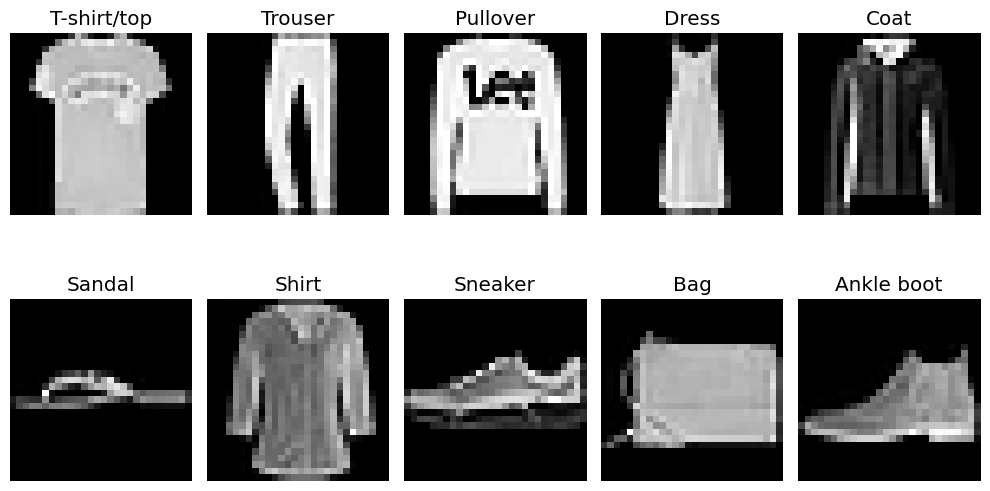

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(_, _), (x_test, y_test) = fashion_mnist.load_data()

# Definir las etiquetas de Fashion MNIST
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Imprimir una imagen de cada clase
plt.figure(figsize=(10, 6))
for i in range(10):
    index = (y_test == i).nonzero()[0][0]
    image = x_test[index]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(fashion_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Cargar datos
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesamiento de datos
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [ ]:
# despliega las dimensiones de los arreglos
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28)
(60000, 10)
(10000,)


In [ ]:
# Definir ResNet block
def resnet_block(input_layer, filters, kernel_size=(3, 3), strides=(1, 1), padding='same'):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding=padding)(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_layer])
    x = Activation('relu')(x)
    return x

# Construir ResNet
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Añadir bloques ResNet
for _ in range(3):
    x = resnet_block(x, 64)

x = GlobalAveragePooling2D()(x)
output = Dense(10, activation='softmax')(x)


In [ ]:
# 2 Definir hiperparámetros
epochs = 10
batch_size = 64

In [ ]:
# 3 Compilar modelo
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# 4 Entrenar el modelo con los hiperparámetros definidos
Historia =model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 160s 165ms/step - loss: 0.4692 - accuracy: 0.8281 - val_loss: 0.5053 - val_accuracy: 0.8231
Epoch 2/10
938/938 [==============================] - 157s 167ms/step - loss: 0.3229 - accuracy: 0.8820 - val_loss: 0.4360 - val_accuracy: 0.8527
Epoch 3/10
938/938 [==============================] - 150s 160ms/step - loss: 0.2829 - accuracy: 0.8953 - val_loss: 0.3786 - val_accuracy: 0.8635
Epoch 4/10
938/938 [==============================] - 156s 166ms/step - loss: 0.2577 - accuracy: 0.9055 - val_loss: 0.3389 - val_accuracy: 0.8804
Epoch 5/10
938/938 [==============================] - 154s 164ms/step - loss: 0.2394 - accuracy: 0.9112 - val_loss: 0.2945 - val_accuracy: 0.8954
Epoch 6/10
938/938 [==============================] - 158s 168ms/step - loss: 0.2237 - accuracy: 0.9168 - val_loss: 0.3596 - val_accuracy: 0.8728
Epoch 7/10
938/938 [==============================] - 156s 167ms/step - loss: 0.2087 - accuracy: 0.9232 - val_loss: 0.2932 -

In [68]:
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo en el conjunto de prueba
predictions = model.predict(test_images)

# Calcular métricas como precisión, recall, F1-score, etc.
report = classification_report(test_labels.argmax(axis=1), predictions.argmax(axis=1))

# Imprimir el reporte con las métricas
print(report)


313/313 [==============================] - 12s 39ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.95      0.99      0.97      1000
           2       0.82      0.87      0.84      1000
           3       0.93      0.88      0.90      1000
           4       0.91      0.71      0.80      1000
           5       0.97      0.99      0.98      1000
           6       0.68      0.79      0.73      1000
           7       0.98      0.94      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [63]:
# Evaluar el modelo en el conjunto de pruebas
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Pérdida en el conjunto de pruebas: {test_loss}")
print(f"Precisión en el conjunto de pruebas: {test_accuracy}")

313/313 [==============================] - 9s 28ms/step - loss: 0.2949 - accuracy: 0.8981
Pérdida en el conjunto de pruebas: 0.29488739371299744
Precisión en el conjunto de pruebas: 0.8981000185012817


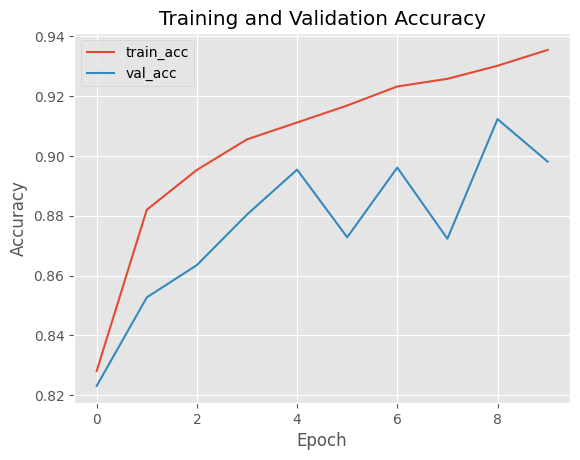

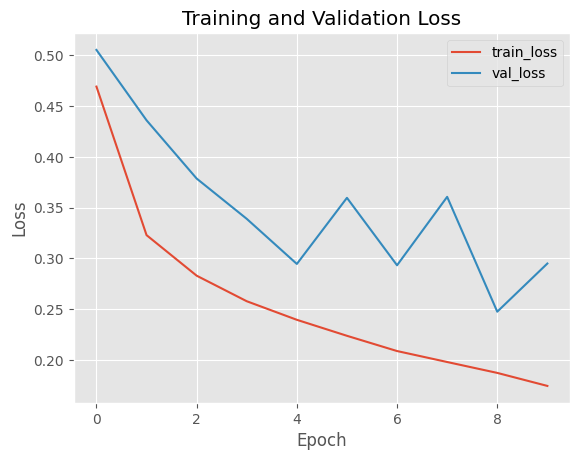

In [67]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# Resumen de la arquitectura del modelo
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 14, 14, 64)           3200      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 14, 14, 64)           256       ['conv2d_3[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 14, 14, 64)           0         ['batch_normalization[0][0

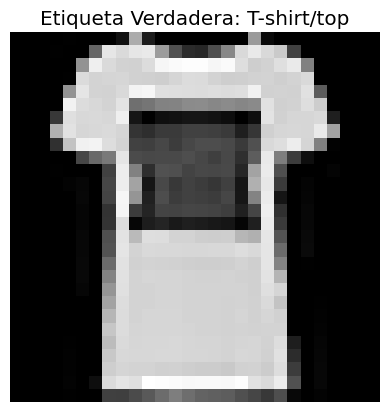

1/1 [==============================] - 0s 23ms/step
Etiqueta Verdadera: T-shirt/top
T-shirt/top: 0.99604
Trouser: 0.00000
Pullover: 0.00012
Dress: 0.00014
Coat: 0.00000
Sandal: 0.00000
Shirt: 0.00370
Sneaker: 0.00000
Bag: 0.00000
Ankle boot: 0.00000
Predicción del modelo: T-shirt/top
El modelo acertó en su predicción.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preprocesar los datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalización de los datos
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Definir las etiquetas de Fashion MNIST
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Seleccionar una imagen aleatoria del conjunto de pruebas
index = np.random.randint(0, len(x_test))
sample_image = x_test[index]
true_label = y_test[index]

# Mostrar la imagen seleccionada junto con la etiqueta verdadera
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Etiqueta Verdadera: {fashion_labels[true_label]}")
plt.axis('off')
plt.show()

# Realizar la predicción con el modelo cargado (reemplaza 'model' con tu modelo LeNet)
predicted = model.predict(np.expand_dims(sample_image, axis=0))

# Imprimir la etiqueta verdadera y las probabilidades de predicción
print(f"Etiqueta Verdadera: {fashion_labels[true_label]}")

for i, prob in enumerate(predicted[0]):
    print(f"{fashion_labels[i]}: {prob:.5f}")

# Imprimir la predicción del modelo
predicted_label = np.argmax(predicted)
predicted_class = fashion_labels[predicted_label]

print(f"Predicción del modelo: {predicted_class}")

# Comprobar si la predicción es correcta y mostrar la etiqueta verdadera
if predicted_label == true_label:
    print(f"El modelo acertó en su predicción.")
else:
    true_class = fashion_labels[true_label]
    print(f"El modelo no acertó en su predicción. La etiqueta verdadera era: {true_class}")

In [ ]:
import numpy as np

# Cargar y preprocesar los datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalización de los datos
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Definir las etiquetas de Fashion MNIST
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Contador de aciertos
aciertos = 0

# Realizar 100 experimentos aleatorios
for _ in range(100):
    # Seleccionar una imagen aleatoria del conjunto de pruebas
    index = np.random.randint(0, len(x_test))
    sample_image = x_test[index]
    true_label = y_test[index]

    # Realizar la predicción con el modelo cargado (reemplaza 'model' con tu modelo LeNet)
    predicted = model.predict(np.expand_dims(sample_image, axis=0))
    predicted_label = np.argmax(predicted)

    # Verificar si la predicción es correcta
    if predicted_label == true_label:
        aciertos += 1

# Imprimir el número de aciertos
print(f"Total de aciertos en 100 experimentos: {aciertos}")


1/1 [==============================] - 0s 24ms/step
Total de aciertos en 100 experimentos: 90
